In [1]:
path = 'HCMST 2017 fresh sample for public sharing draft v1.1.dta'
import pandas as pd
data = pd.read_stata(path)

## Data preparation

In [2]:
data.head()

,CaseID,CASEID_NEW,qflag,weight1,weight1_freqwt,weight2,weight1a,weight1a_freqwt,weight_combo,weight_combo_freqwt,...,hcm2017q24_met_through_family,hcm2017q24_met_through_friend,hcm2017q24_met_through_as_nghbrs,hcm2017q24_met_as_through_cowork,w6_subject_race,interracial_5cat,partner_mother_yrsed,subject_mother_yrsed,partner_yrsed,subject_yrsed
0,2,2014039,Qualified,NaN,NaN,0.8945,NaN,NaN,0.277188,19240.0,...,no,no,no,no,White,no,12.0,14.0,12.0,14.0
1,3,2019003,Qualified,0.9078,71115.0,NaN,0.9026,70707.0,1.020621,70841.0,...,no,no,no,yes,White,no,12.0,16.0,17.0,17.0
2,5,2145527,Qualified,0.7205,56442.0,NaN,0.7164,56121.0,0.810074,56227.0,...,no,no,no,no,White,no,9.0,7.5,14.0,17.0
3,6,2648857,Qualified,1.2597,98682.0,1.3507,1.2524,98110.0,0.418556,29052.0,...,no,no,no,no,White,no,16.0,12.0,12.0,12.0
4,7,2623465,Qualified,0.8686,68044.0,NaN,0.8636,67652.0,0.976522,67781.0,...,no,no,yes,no,White,no,14.0,17.0,16.0,16.0


In [3]:
data.columns

Index(['CaseID', 'CASEID_NEW', 'qflag', 'weight1', 'weight1_freqwt', 'weight2',
       'weight1a', 'weight1a_freqwt', 'weight_combo', 'weight_combo_freqwt',
       ...
       'hcm2017q24_met_through_family', 'hcm2017q24_met_through_friend',
       'hcm2017q24_met_through_as_nghbrs', 'hcm2017q24_met_as_through_cowork',
       'w6_subject_race', 'interracial_5cat', 'partner_mother_yrsed',
       'subject_mother_yrsed', 'partner_yrsed', 'subject_yrsed'],
      dtype='object', length=285)

In [5]:
y = data['S1']
y.value_counts()

Yes, I am Married       2085
No, I am not Married    1425
Name: S1, dtype: int64

In [8]:
x = data.drop(['S1'], inplace=False, axis=1)
x.head()

,CaseID,CASEID_NEW,qflag,weight1,weight1_freqwt,weight2,weight1a,weight1a_freqwt,weight_combo,weight_combo_freqwt,...,hcm2017q24_met_through_family,hcm2017q24_met_through_friend,hcm2017q24_met_through_as_nghbrs,hcm2017q24_met_as_through_cowork,w6_subject_race,interracial_5cat,partner_mother_yrsed,subject_mother_yrsed,partner_yrsed,subject_yrsed
0,2,2014039,Qualified,NaN,NaN,0.8945,NaN,NaN,0.277188,19240.0,...,no,no,no,no,White,no,12.0,14.0,12.0,14.0
1,3,2019003,Qualified,0.9078,71115.0,NaN,0.9026,70707.0,1.020621,70841.0,...,no,no,no,yes,White,no,12.0,16.0,17.0,17.0
2,5,2145527,Qualified,0.7205,56442.0,NaN,0.7164,56121.0,0.810074,56227.0,...,no,no,no,no,White,no,9.0,7.5,14.0,17.0
3,6,2648857,Qualified,1.2597,98682.0,1.3507,1.2524,98110.0,0.418556,29052.0,...,no,no,no,no,White,no,16.0,12.0,12.0,12.0
4,7,2623465,Qualified,0.8686,68044.0,NaN,0.8636,67652.0,0.976522,67781.0,...,no,no,yes,no,White,no,14.0,17.0,16.0,16.0


### Choosing ge

In [9]:
features = ["Q5", "Q9", "Q16", "w6_sex_frequency", "partner_yrsed"]

* Q5 same sex couple
* Q9 partner's age
* Q16 relatives seen
* partnet_yrsed partner's educational attainment

In [10]:
x = x[features]

In [11]:
x = x.rename(index=str, columns={
    "Q5": "same_sex",
    "Q9": "partner_age",
    "Q16": "relatives_seen",
    "w6_sex_frequency": "sex_frequency",
    "partner_yrsed": "educational_attainment"
})

In [12]:
x.head()

,same_sex,partner_age,relatives_seen,sex_frequency,educational_attainment
0,NaN,NaN,NaN,NaN,12.0
1,NaN,52,1.0,Once a month or less,17.0
2,NaN,45,0.0,2 to 3 times a month,14.0
3,NaN,NaN,NaN,NaN,12.0
4,NaN,59,0.0,3 to 6 times a week,16.0


In [13]:
for f in x.columns:
    print("\n################ {} ##########\n".format(f))
    print(x[f].value_counts(dropna=False))


################ same_sex ##########

NaN                                  3042
No, we are an opposite-sex couple     246
Yes, we are a same-sex couple         222
Name: same_sex, dtype: int64

################ partner_age ##########

NaN        654
55.0        79
60.0        73
58.0        70
62.0        66
27.0        64
53.0        64
29.0        63
37.0        63
52.0        63
30.0        62
56.0        61
63.0        60
26.0        60
34.0        58
65.0        58
59.0        57
28.0        56
61.0        56
49.0        55
46.0        54
42.0        54
50.0        53
57.0        53
45.0        51
36.0        50
38.0        50
64.0        50
54.0        49
51.0        48
          ... 
22.0        29
74.0        28
21.0        25
24.0        24
23.0        24
73.0        23
Refused     21
78.0        19
76.0        19
79.0        17
77.0        13
18.0        12
20.0        12
80.0        11
81.0         8
19.0         7
84.0         7
83.0         7
82.0         3
91.0         3

In [16]:
x = x[-pd.isna(x['educational_attainment'])]

In [17]:
x = x[-pd.isna(x['partner_age'])]

In [18]:
x = x[x['partner_age'] != 'Refused']

In [19]:
x = x[-pd.isna(x['relatives_seen'])]

In [20]:
x = x[-pd.isna(x['sex_frequency'])]

In [21]:
x = x[x['sex_frequency'] != 'Refused']

In [22]:
len(x)

2663

In [23]:
dummies_df = pd.get_dummies(x[["sex_frequency", "same_sex"]], dummy_na=True)

In [24]:
dummies_df = dummies_df.drop('sex_frequency_Refused', inplace=False, axis=1)
dummies_df = dummies_df.drop('sex_frequency_nan', inplace=False, axis=1)

In [25]:
dummies_df.head()

,sex_frequency_Once a day or more,sex_frequency_3 to 6 times a week,sex_frequency_Once or twice a week,sex_frequency_2 to 3 times a month,sex_frequency_Once a month or less,"same_sex_Yes, we are a same-sex couple","same_sex_No, we are an opposite-sex couple",same_sex_nan
1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1
4,0,1,0,0,0,0,0,1
5,0,0,0,0,1,0,1,0
6,0,0,0,0,1,0,0,1


In [26]:
X_train = pd.concat([x[["partner_age", "relatives_seen", "educational_attainment"]], dummies_df], axis=1)

In [27]:
print(x.shape, dummies_df.shape)

(2663, 5) (2663, 8)


In [28]:
X_train

,partner_age,relatives_seen,educational_attainment,sex_frequency_Once a day or more,sex_frequency_3 to 6 times a week,sex_frequency_Once or twice a week,sex_frequency_2 to 3 times a month,sex_frequency_Once a month or less,"same_sex_Yes, we are a same-sex couple","same_sex_No, we are an opposite-sex couple",same_sex_nan
1,52,1.0,17.0,0,0,0,0,1,0,0,1
2,45,0.0,14.0,0,0,0,1,0,0,0,1
4,59,0.0,16.0,0,1,0,0,0,0,0,1
5,60,0.0,16.0,0,0,0,0,1,0,1,0
6,67,0.0,13.0,0,0,0,0,1,0,0,1
7,65,2.0,20.0,0,0,0,1,0,0,0,1
10,43,3.0,16.0,0,0,0,1,0,0,0,1
14,35,0.0,17.0,0,0,1,0,0,0,0,1
15,42,0.0,17.0,0,0,0,1,0,0,1,0
16,37,8.0,13.0,1,0,0,0,0,0,1,0


### Train model

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

In [30]:
y.head()

0    No, I am not Married
1       Yes, I am Married
2       Yes, I am Married
3    No, I am not Married
4       Yes, I am Married
Name: S1, dtype: category
Categories (2, object): [Yes, I am Married < No, I am not Married]

In [31]:
valid_rows = [int(row) for row in X_train.index]

In [32]:
y = y[valid_rows]

In [33]:
gb_clf = GradientBoostingClassifier()
gb_clf = gb_clf.fit(X_train.values, y)

### Observation to be explained

In [34]:
X_train.head()

,partner_age,relatives_seen,educational_attainment,sex_frequency_Once a day or more,sex_frequency_3 to 6 times a week,sex_frequency_Once or twice a week,sex_frequency_2 to 3 times a month,sex_frequency_Once a month or less,"same_sex_Yes, we are a same-sex couple","same_sex_No, we are an opposite-sex couple",same_sex_nan
1,52,1.0,17.0,0,0,0,0,1,0,0,1
2,45,0.0,14.0,0,0,0,1,0,0,0,1
4,59,0.0,16.0,0,1,0,0,0,0,0,1
5,60,0.0,16.0,0,0,0,0,1,0,1,0
6,67,0.0,13.0,0,0,0,0,1,0,0,1


In [35]:
X_train.describe()

,relatives_seen,educational_attainment,sex_frequency_Once a day or more,sex_frequency_3 to 6 times a week,sex_frequency_Once or twice a week,sex_frequency_2 to 3 times a month,sex_frequency_Once a month or less,"same_sex_Yes, we are a same-sex couple","same_sex_No, we are an opposite-sex couple",same_sex_nan
count,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000
mean,3.502065,14.208787,0.031919,0.137439,0.276005,0.193391,0.361247,0.080360,0.088246,0.831393
std,5.108946,2.479171,0.175817,0.344375,0.447103,0.395031,0.480452,0.271902,0.283706,0.374475
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.000000,16.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,50.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* partner 40 years old
* 2 relatives seen
* level of education 10
* sex frequency once a day or more
* opposite sex couple

In [36]:
observation = [40, 2, 10, 1, 0, 0, 0, 0, 0, 1, 0]

In [37]:
gb_clf.classes_

array(['No, I am not Married', 'Yes, I am Married'], dtype=object)

In [38]:
gb_clf.predict_proba([observation])[0][1]

0.4634210266727765

In [40]:
import numpy as np

In [41]:
partner_splits = np.linspace(min(X_train['partner_age']), max(X_train['partner_age']), 40)

In [42]:
educational_splits = np.unique(X_train['educational_attainment'])

In [43]:
relatives_splits = np.array(range(int(max(X_train['relatives_seen'])) + 1))

In [45]:
%matplotlib inline
def ceteris_paribus(splits, variable):
    n_points = len(splits)
    profiles = np.tile(observation, (n_points, 1))
    df = pd.DataFrame(profiles, columns=X_train.columns)
    df[variable] = splits
    df['married'] = gb_clf.predict_proba(df.values)[::,1]
    df.plot(x=variable, y='married')

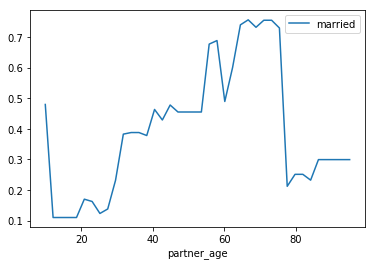

In [46]:
ceteris_paribus(partner_splits, 'partner_age')

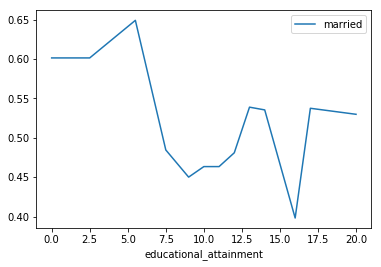

In [47]:
ceteris_paribus(educational_splits, 'educational_attainment')

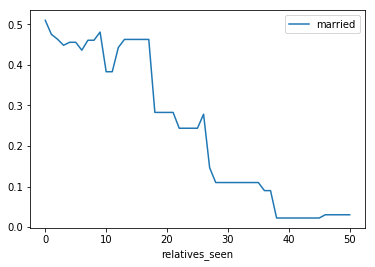

In [49]:
ceteris_paribus(relatives_splits, 'relatives_seen')